In [1]:
# Importing all the necessary libraries......
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm    
import statsmodels.formula.api as smf
pd.options.display.max_columns= None

### Reading the main dataset file

In [3]:
ma=pd.read_csv('File_formatted_in_Excel & Data_Analysis File.csv')

In [4]:
ma.shape

(233154, 51)

### Preparing bins for 'CREDIT_SCORE' and finding the minimum CREDIT_SCORE required to get a loan.

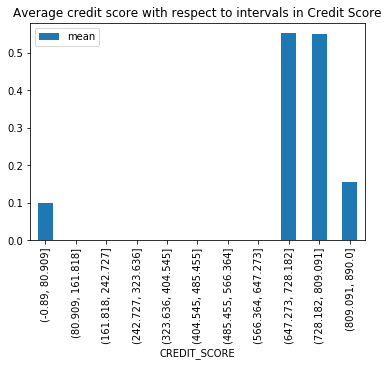

In [5]:
# DIviding the column into number of bins....
credit_cut=pd.cut(ma['CREDIT_SCORE'],11)
#Grouping to categorize credit score according to LOAN....
credit=ma.groupby(credit_cut)['LOAN'].agg(['mean'])
credit.reset_index()
# Plotting 
credit.plot(kind='bar',title='Average credit score with respect to intervals in Credit Score')

### Preparing bins for 'AGE' and finding the age group which is getting more loans sanctioned.


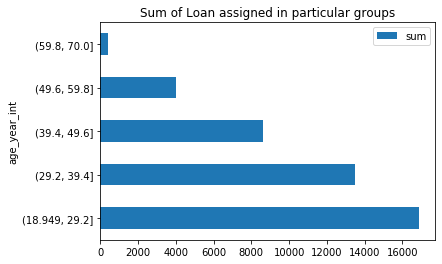

In [6]:
# Dividing the column into number of bins.
age_cut=pd.cut(ma['age_year_int'],5)
# Grouping and plotting the data which shows Loan according to different age groups.
ma['age_cut']=age_cut
ma['Loan1'] = np.squeeze(np.asarray(ma['LOAN']))
ma.groupby(age_cut)['LOAN'].agg(['sum']).plot(kind='barh',title='Sum of Loan assigned in particular groups')

Text(0.5, 1.0, 'Sum of Loan assigned in employment types')

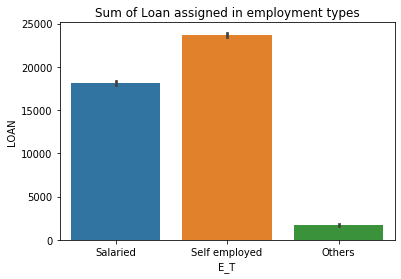

In [7]:
# Plotting number of loan distributed in employment type.
sns.barplot(x='E_T',y='LOAN', data=ma, estimator=np.sum).set_title('Sum of Loan assigned in employment types')

Text(0.5, 1.0, 'Number of Loans assigned to each Employment Type')

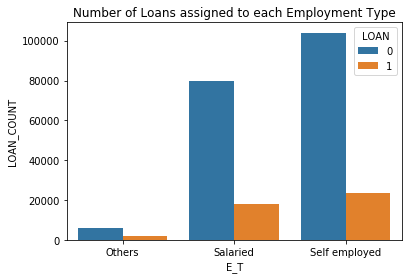

In [8]:
# Grouping employment type & loan to get the count of Loan (1=Yes).
ax = ma.groupby(['E_T','LOAN']).agg({'LOAN':'count'})
ax.rename(columns={"LOAN":'LOAN_COUNT'},inplace=True)
ax = ax.reset_index()
ax
# Plotting to vizualise number of loan sanctioned to each employment type.
sns.barplot(x='E_T',y='LOAN_COUNT',data=ax,hue='LOAN').set_title('Number of Loans assigned to each Employment Type')

### Finding which employement type people are getting many loans over $100K

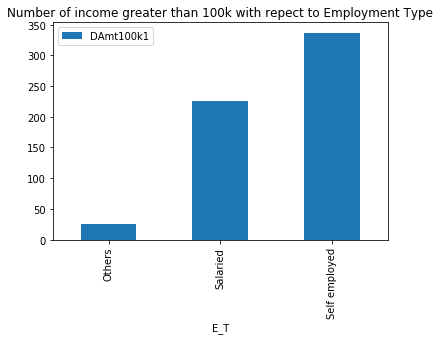

In [9]:
# Dividing income into two different groups (greater than or equal to 100k & less than 100k)
ma['DAmt100k']=pd.cut(ma['A_D'], [-1,100000,ma['A_D'].max()], labels=[0,1])
# Plotting the different group to show salary greater than 100k & their repective employment type.
ma['DAmt100k1'] = np.squeeze(np.asarray(ma['DAmt100k']))
ma.groupby('E_T').agg({'DAmt100k1':'sum'})\
    .plot(kind='bar',title='Number of income greater than 100k with repect to Employment Type')

In [10]:
import statsmodels.formula.api as smf
model=smf.logit('LOAN ~ INCOME + CREDIT_SCORE + NEW_A_I_L_S_M + DEL_A_I_L_S_M + Avg_acc_age_in_months + Credit_hist_len_in_months + age_year_int', data=ma)
results=model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.302913
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   LOAN   No. Observations:               233154
Model:                          Logit   Df Residuals:                   233146
Method:                           MLE   Df Model:                            7
Date:                Sat, 30 Nov 2019   Pseudo R-squ.:                  0.3701
Time:                        16:38:05   Log-Likelihood:                -70625.
converged:                       True   LL-Null:                   -1.1212e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.2860      0.051   -162.426      0.000      -8.386      -8.186
INCOME                     7.405e-05   4.61e-07    160.666      0.000    7.31e-05     7.5e-05
CREDIT_SCORE                  0.0031    2.9e-05    107.948      0.000       0.003       0.003
NEW_A_I_L_S_M                 0.1641      0.006     25.806      0.000       0.152       0.177
DEL_A_I_L_S_M                -4.7174      0.072    -65.703      0.000      -4.858      -4.577
Avg_acc_age_in_months        -0.1435      0.003    -54.795      0.000      -0.149      -0.138
Credit_hist_len_in_months     0.1957      0.002     92.419      0.000       0.192       0.200
age_year_int                 -0.0156      0.001    -20.878      0.000      -0.017      -0.014
=============================================================================================
"""

In [11]:
cols=['INCOME' , 'CREDIT_SCORE' , 'NEW_A_I_L_S_M' , 'DEL_A_I_L_S_M' , 'Avg_acc_age_in_months' , 'Credit_hist_len_in_months' , 'age_year_int']
X=ma[cols]
y=ma['LOAN']

In [12]:
import statsmodels.api as smf
logit_model=smf.Logit(y,X)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.386938
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   LOAN   No. Observations:               233154
Model:                          Logit   Df Residuals:                   233147
Method:                           MLE   Df Model:                            6
Date:                Sat, 30 Nov 2019   Pseudo R-squ.:                  0.1953
Time:                        16:38:08   Log-Likelihood:                -90216.
converged:                       True   LL-Null:                   -1.1212e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
INCOME                     1.642e-05   2.09e-07     78.494      0.000     1.6e-05    1.68e-05
CREDIT_SCORE                  0.0020   2.52e-05     81.439      0.000       0.002       0.002
NEW_A_I_L_S_M                 0.0886      0.006     14.478      0.000       0.077       0.101
DEL_A_I_L_S_M                -3.5575      0.055    -65.201      0.000      -3.664      -3.451
Avg_acc_age_in_months        -0.1392      0.003    -55.096      0.000      -0.144      -0.134
Credit_hist_len_in_months     0.2081      0.002    100.568      0.000       0.204       0.212
age_year_int                 -0.1089      0.001   -176.148      0.000      -0.110      -0.108
=============================================================================================
"""

### Accuracy predictor code

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81
